# Project Stage - III (Basic Machine Learning)

### Tasks:

#### Task 1: (70 pts)
- Team: (30)
    - Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US.
        - Start your data from the first day of infections in US. X-Axis, number of days since the first case, Y-Axis number of new cases and deaths.
        - Aim to predict 1 week in advance. Use older data to validate your models. Use Root Mean Square Error (RMSE) to see the evaluation.
        - Describe the trends as compared to other countries. 
- Member: (40 pts)
    - Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties. Start your data from the first day of infections. X-Axis, number of days since the first case, Y-Axis number of new cases and deaths. Calcluate error using RMSE.
    - Identify which counties are most at risk. Model for top 5 counties with cases within a state and observe their trends.
    - Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.
    - Utilize decision tree, random forest, and ARIMA (https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) based models to compare and contrast the performance of each. X-variable is the previous weeks data, Y-variable is current week data. So you are predicting one week in advance. Calculate RMSE error. This is just based on number of cases.
    - Use 5 different variables from the enrichment data to predict the spread rate (cases and deaths) of COVID-19 in a county. Compare Random Forest and Decision Trees (RMSE error).
        - For example, percentage of population in certain age-group, socio-economic status, public transportation, work from home, etc.
        - Show the relative importance of variables and explain why. 
    
#### Task 2: (30 pts)
- Member:
    - For each of the aforemention analysis plot graphs,
        - trend line
        - confidence intervals (error in prediction)
        - prediction path

**Deliverable**
- Report upload on canvas.
- Each member creates separate notebooks for member tasks. Upload all notebooks to Github Repository.

# Task 1 (Member):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

# Show plots directly in notebook
%matplotlib inline

# Importing data to be used through out the tasks
population_import = pd.read_csv('../Data/Input/covid_county_population_usafacts.csv')
confirmed_import = pd.read_csv('../Data/Input/covid_confirmed_usafacts.csv')
deaths_import = pd.read_csv('../Data/Input/covid_deaths_usafacts.csv')

In [36]:
# Picking NC for regression models
confirmed_cases_NC = confirmed_import[confirmed_import['State']=='NC']

# Getting rid of 'Statewide Unallocated'
confirmed_cases_NC = confirmed_cases_NC[confirmed_cases_NC.countyFIPS > 0]
confirmed_cases_NC = confirmed_cases_NC.drop(columns=['stateFIPS'])

# Only keeping days since first infections
confirmed_cases_NC = confirmed_cases_NC.drop(confirmed_cases_NC.loc[:, '1/22/20':'3/1/20'].columns, axis = 1)

# Setting the index
confirmed_cases_NC = confirmed_cases_NC.set_index(['countyFIPS','County Name','State'])

confirmed_cases_NC

,,,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
37001,Alamance County,NC,0,0,0,0,0,0,0,0,0,0,...,4555,4580,4675,4757,4790,4815,4828,4852,4899,4958
37003,Alexander County,NC,0,0,0,0,0,0,0,0,0,0,...,623,636,653,671,698,706,730,741,751,797
37005,Alleghany County,NC,0,0,0,0,0,0,0,0,0,0,...,258,261,262,264,265,269,270,271,275,278
37007,Anson County,NC,0,0,0,0,0,0,0,0,0,0,...,678,680,687,689,694,696,699,702,706,713
37009,Ashe County,NC,0,0,0,0,0,0,0,0,0,0,...,336,347,358,364,366,367,370,370,377,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37191,Wayne County,NC,0,0,0,0,0,0,0,0,0,0,...,3938,3996,4056,4095,4171,4190,4200,4252,4313,4387
37193,Wilkes County,NC,0,0,0,0,0,0,0,0,0,0,...,1488,1511,1533,1543,1553,1566,1569,1587,1606,1647
37195,Wilson County,NC,0,0,0,0,0,0,0,0,0,0,...,2554,2585,2640,2670,2699,2719,2737,2757,2797,2860


In [37]:
# Grabbing the sum of cases across NC
cc_NC_sum = confirmed_cases_NC.sum()

cc_NC_sum

3/2/20           0
3/3/20           1
3/4/20           1
3/5/20           1
3/6/20           2
             ...  
10/19/20    247168
10/20/20    248750
10/21/20    250586
10/22/20    252992
10/23/20    256284
Length: 236, dtype: int64

In [56]:
# Creating dataframe for NC
cases_nc = pd.DataFrame({'Cases':cc_NC_sum})
cases_nc['Days Since 1st Case'] = range(len(cases_nc))
cases_nc.Cases = cases_nc.Cases.diff().fillna(0)
cases_nc

,Cases,Days Since 1st Case
3/2/20,0.0,0
3/3/20,1.0,1
3/4/20,0.0,2
3/5/20,0.0,3
3/6/20,1.0,4
...,...,...
10/19/20,1174.0,231
10/20/20,1582.0,232
10/21/20,1836.0,233
10/22/20,2406.0,234


<AxesSubplot:xlabel='Days Since 1st Case', ylabel='Cases'>

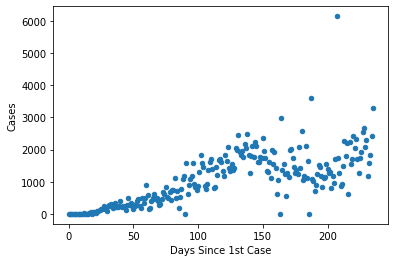

In [55]:
cases_nc.plot.scatter(x='Days Since 1st Case', y='Cases')

<b>Basic scatter plot for weekly cases across NC</b>

In [57]:
# Correlation coefficients
cases_nc.corr()

,Cases,Days Since 1st Case
Cases,1.000000,0.731648
Days Since 1st Case,0.731648,1.000000


In [58]:
# Make variables 
days_since_cases = pd.DataFrame(cases_nc['Days Since 1st Case'])
nc_cases = pd.DataFrame(cases_nc['Cases'])

In [59]:
# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, nc_cases)

In [60]:
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, nc_cases)))

Intercept: [32.39379961]
Coefficient: [[8.96642854]]
Score: 0.5353083035269535


In [62]:
# Predict values for the linear regression line
nc_cases_predict = model.predict(days_since_cases)

Text(0, 0.5, 'NC Cases')

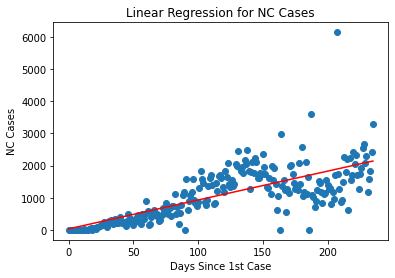

In [63]:
#Plot the linear regression line
plt.scatter(days_since_cases, nc_cases)
plt.plot(days_since_cases, nc_cases_predict, color='red')
plt.title("Linear Regression for NC Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("NC Cases")

In [64]:
# Now to do polynomial regression for NC cases
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 2)
nc_cases_polynom = polynom.fit_transform(nc_cases)

nc_cases_polynom

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+00, 2.5000000e+01],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 8.0000000e+00, 6.4000000e+01],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.5000000e+01, 2.2500000e+02],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 7.0000000e+00, 4.9000000e+01],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.2000000e+01, 4.8400000e+02],
       [1.0000000e+00, 7.4000000e+01, 5.4760000e+03],
       [1.0000000e+00, 0.000

In [65]:
# Fitting the model for polynomial regression
PolyReg = linear_model.LinearRegression()
PolyReg.fit(nc_cases_polynom, nc_cases_predict)

LinearRegression()

Text(0, 0.5, 'NC Cases')

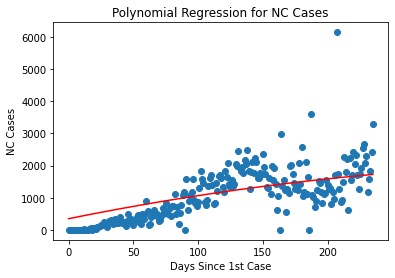

In [66]:
# Visualize the polynomial regression line
#Plot the linear regression line
plt.scatter(days_since_cases, nc_cases)

#plt.plot(weeks_since_cases, PolyReg.predict(polynom.fit_transform(nc_cases)), color='red')
plt.plot(days_since_cases, PolyReg.predict(polynom.fit_transform(nc_cases_predict)), color='red')
plt.title("Polynomial Regression for NC Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("NC Cases")

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Printing the RMSE
print('RMSE of NC cases: {}'.format(sqrt(mean_squared_error(nc_cases, nc_cases_predict))))

RMSE of NC cases: 569.1378102302157


<b> Above is the RMSE of NC cases, which is 569.13</b>

# Now we do the same models, but for NC deaths..

In [69]:
deaths_nc = deaths_import[deaths_import['State']=='NC']

deaths_nc = deaths_nc[deaths_nc.countyFIPS > 0]
deaths_nc = deaths_nc.drop(columns=['stateFIPS'])

# Only keeping days since first death
deaths_nc = deaths_nc.drop(deaths_nc.loc[:, '1/22/20':'3/24/20'].columns, axis = 1)

# Setting the index
deaths_nc = deaths_nc.set_index(['countyFIPS','County Name','State'])

deaths_nc_sum = deaths_nc.sum()
deaths_nc_sum

3/25/20        1
3/26/20        1
3/27/20        3
3/28/20        4
3/29/20        4
            ... 
10/19/20    3939
10/20/20    3992
10/21/20    3992
10/22/20    4082
10/23/20    4082
Length: 213, dtype: int64

In [71]:
# Creating dataframe for NC
deaths_nc = pd.DataFrame({'Deaths':deaths_nc_sum})
deaths_nc['Days Since 1st Death'] = range(len(deaths_nc))
deaths_nc.Deaths = deaths_nc.Deaths.diff().fillna(0)
deaths_nc

,Deaths,Days Since 1st Death
3/25/20,0.0,0
3/26/20,0.0,1
3/27/20,2.0,2
3/28/20,1.0,3
3/29/20,0.0,4
...,...,...
10/19/20,5.0,208
10/20/20,53.0,209
10/21/20,0.0,210
10/22/20,90.0,211


In [72]:
# Make variables for linear regression
days_since_deaths = pd.DataFrame(deaths_nc['Days Since 1st Death'])
nc_deaths = pd.DataFrame(deaths_nc['Deaths'])

In [73]:
# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_deaths, nc_deaths)

In [74]:
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_deaths, nc_deaths)))

Intercept: [9.25571498]
Coefficient: [[0.09343311]]
Score: 0.12517513073758413


In [75]:
# Predict values for the linear regression line
nc_deaths_predict = model.predict(days_since_deaths)

Text(0, 0.5, 'NC Deaths')

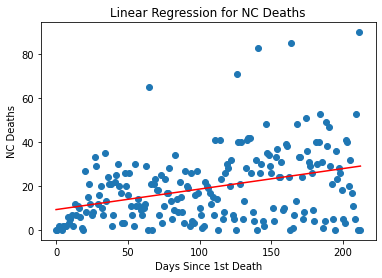

In [76]:
#Plot the linear regression line
plt.scatter(days_since_deaths, nc_deaths)
plt.plot(days_since_deaths, nc_deaths_predict, color='red')
plt.title("Linear Regression for NC Deaths")
plt.xlabel("Days Since 1st Death")
plt.ylabel("NC Deaths")

In [77]:
# Now to do polynomial regression for NC deaths
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 2)
nc_deaths_polynom = polynom.fit_transform(nc_deaths)

nc_deaths_polynom

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.100e+01, 4.41

In [78]:
# Fitting the model for polynomial regression
PolyReg = linear_model.LinearRegression()
PolyReg.fit(nc_deaths_polynom, nc_deaths_predict)

LinearRegression()

Text(0, 0.5, 'NC Deaths')

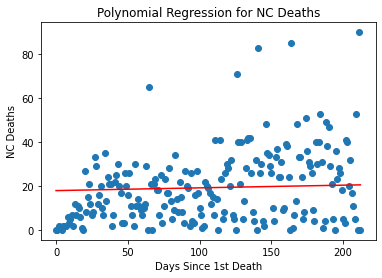

In [79]:
# Visualize the polynomial regression line
#Plot the linear regression line
plt.scatter(days_since_deaths, nc_deaths)

plt.plot(days_since_deaths, PolyReg.predict(polynom.fit_transform(nc_deaths_predict)), color='red')
plt.title("Polynomial Regression for NC Deaths")
plt.xlabel("Days Since 1st Death")
plt.ylabel("NC Deaths")

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Printing the RMSE
print('RMSE of NC deaths: {}'.format(sqrt(mean_squared_error(nc_deaths, nc_deaths_predict))))

RMSE of NC deaths: 15.187508106789169


<b> Above is the RMSE of NC deaths, which is 15.18</b>

# Now, lets get the top 5 counties in NC and create models for them

In [5]:
confirmed_cases_NC.sort_values(by = '10/23/20', ascending = False)

,,,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
37119,Mecklenburg County,NC,0,0,0,0,0,0,0,0,0,2,...,30818,31074,31279,31442,31688,31820,32038,32264,32457,32751
37183,Wake County,NC,0,1,1,1,1,1,1,6,7,8,...,19334,19454,19583,19668,19801,19888,19952,20015,20165,20376
37081,Guilford County,NC,0,0,0,0,0,0,0,0,0,0,...,10088,10184,10286,10357,10438,10514,10571,10619,10720,10869
37063,Durham County,NC,0,0,0,0,0,0,0,0,0,1,...,8360,8441,8484,8508,8567,8590,8631,8652,8696,8768
37067,Forsyth County,NC,0,0,0,0,0,0,0,0,0,2,...,7813,7887,7968,8049,8131,8155,8201,8264,8319,8473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37103,Jones County,NC,0,0,0,0,0,0,0,0,0,0,...,170,171,173,173,173,173,173,176,184,191
37095,Hyde County,NC,0,0,0,0,0,0,0,0,0,0,...,149,158,174,174,174,174,174,175,175,175
37073,Gates County,NC,0,0,0,0,0,0,0,0,0,0,...,158,158,160,160,161,162,162,164,166,167


<b>Sorting the above we can see that the TOP 5 counties with the highest case rates are:
    <br>
    1.) Mecklenburg County 
    <br>
    2.) Wake County 
    <br>
    3.) Guilford County
    <br>
    4.) Durham and 
    <br>
    5.) Forsyth!</b>
    
Now lets attach models!

<b> Starting with Mecklenburg County </b>

In [81]:
# Picking Mecklenburg for regression model
cc_mecklenburg = confirmed_import[confirmed_import['State']=='NC']

# Getting rid of 'Statewide Unallocated'
cc_mecklenburg = cc_mecklenburg.drop(columns=['stateFIPS'])
cc_mecklenburg = cc_mecklenburg[cc_mecklenburg['County Name']=='Mecklenburg County']

# Only keeping days since first infections
cc_mecklenburg = cc_mecklenburg.drop(cc_mecklenburg.loc[:, '1/22/20':'3/10/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_mecklenburg = cc_mecklenburg.set_index(['countyFIPS','County Name','State'])

cc_mecklenburg

,,,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
37119,Mecklenburg County,NC,2,2,2,4,4,7,7,11,28,28,...,30818,31074,31279,31442,31688,31820,32038,32264,32457,32751


In [82]:
# Grabbing the sum
cc_mecklenburg_sum = cc_mecklenburg.sum()
cc_mecklenburg_sum

3/11/20         2
3/12/20         2
3/13/20         2
3/14/20         4
3/15/20         4
            ...  
10/19/20    31820
10/20/20    32038
10/21/20    32264
10/22/20    32457
10/23/20    32751
Length: 227, dtype: int64

In [83]:
# Creating dataframe 
cases_mecklenburg = pd.DataFrame({'Cases':cc_mecklenburg_sum})
cases_mecklenburg['Days Since 1st Case'] = range(len(cases_mecklenburg))
cases_mecklenburg.Cases = cases_mecklenburg.Cases.diff().fillna(0)
cases_mecklenburg

,Cases,Days Since 1st Case
3/11/20,0.0,0
3/12/20,0.0,1
3/13/20,0.0,2
3/14/20,2.0,3
3/15/20,0.0,4
...,...,...
10/19/20,132.0,222
10/20/20,218.0,223
10/21/20,226.0,224
10/22/20,193.0,225


Intercept: [67.82390447]
Coefficient: [[0.67650281]]
Score: 0.14380807524467842


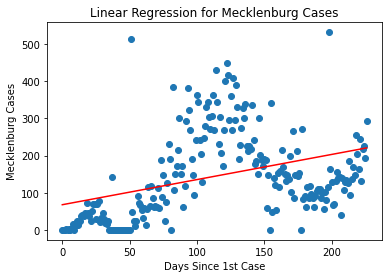

In [85]:
# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_mecklenburg['Days Since 1st Case'])
mecklenburg_cases = pd.DataFrame(cases_mecklenburg['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, mecklenburg_cases)

# Predict values for the linear regression line
mecklenburg_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, mecklenburg_cases)
plt.plot(days_since_cases, mecklenburg_cases_predict, color='red')
plt.title("Linear Regression for Mecklenburg Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("Mecklenburg Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, mecklenburg_cases)))

<b> Wake County </b>

In [86]:
# Picking Wake county for regression model
cc_wake = confirmed_import[confirmed_import['State']=='NC']

# Getting rid of 'Statewide Unallocated'
cc_wake = cc_wake.drop(columns=['stateFIPS'])
cc_wake = cc_wake[cc_wake['County Name']=='Wake County']

# Only keeping days since first infections
cc_wake = cc_wake.drop(cc_wake.loc[:, '1/22/20':'3/2/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_wake = cc_wake.set_index(['countyFIPS','County Name','State'])

cc_wake

,,,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
37183,Wake County,NC,1,1,1,1,1,1,6,7,8,8,...,19334,19454,19583,19668,19801,19888,19952,20015,20165,20376


In [87]:
# Grabbing the sum
cc_wake_sum = cc_wake.sum()
cc_wake_sum

3/3/20          1
3/4/20          1
3/5/20          1
3/6/20          1
3/7/20          1
            ...  
10/19/20    19888
10/20/20    19952
10/21/20    20015
10/22/20    20165
10/23/20    20376
Length: 235, dtype: int64

In [88]:
# Creating dataframe 
cases_wake = pd.DataFrame({'Cases':cc_wake_sum})
cases_wake['Days Since 1st Case'] = range(len(cases_wake))
cases_wake.Cases = cases_wake.Cases.diff().fillna(0)
cases_wake

,Cases,Days Since 1st Case
3/3/20,0.0,0
3/4/20,0.0,1
3/5/20,0.0,2
3/6/20,0.0,3
3/7/20,0.0,4
...,...,...
10/19/20,87.0,230
10/20/20,64.0,231
10/21/20,63.0,232
10/22/20,150.0,233


Intercept: [14.25640101]
Coefficient: [[0.61919424]]
Score: 0.3439862010546242


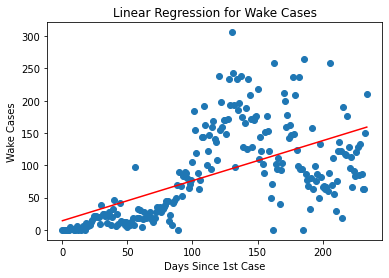

In [93]:
# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_wake['Days Since 1st Case'])
wake_cases = pd.DataFrame(cases_wake['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, wake_cases)

# Predict values for the linear regression line
wake_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, wake_cases)
plt.plot(days_since_cases, wake_cases_predict, color='red')
plt.title("Linear Regression for Wake Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("Wake Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, wake_cases)))

<b> Guilford County </b>

In [90]:
# Picking Guilford county for regression model
cc_guilford = confirmed_import[confirmed_import['State']=='NC']

cc_guilford = cc_guilford.drop(columns=['stateFIPS'])
cc_guilford = cc_guilford[cc_guilford['County Name']=='Guilford County']

# Only keeping days since first infections
cc_guilford = cc_guilford.drop(cc_guilford.loc[:, '1/22/20':'3/17/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_guilford = cc_guilford.set_index(['countyFIPS','County Name','State'])

cc_guilford

,,,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
37081,Guilford County,NC,1,4,4,7,11,11,16,22,24,31,...,10088,10184,10286,10357,10438,10514,10571,10619,10720,10869


In [91]:
# Grabbing the sum
cc_guilford_sum = cc_guilford.sum()
cc_guilford_sum

3/18/20         1
3/19/20         4
3/20/20         4
3/21/20         7
3/22/20        11
            ...  
10/19/20    10514
10/20/20    10571
10/21/20    10619
10/22/20    10720
10/23/20    10869
Length: 220, dtype: int64

In [92]:
# Creating dataframe 
cases_guilford = pd.DataFrame({'Cases':cc_guilford_sum})
cases_guilford['Days Since 1st Case'] = range(len(cases_guilford))
cases_guilford.Cases = cases_guilford.Cases.diff().fillna(0)
cases_guilford

,Cases,Days Since 1st Case
3/18/20,0.0,0
3/19/20,3.0,1
3/20/20,0.0,2
3/21/20,3.0,3
3/22/20,4.0,4
...,...,...
10/19/20,76.0,215
10/20/20,57.0,216
10/21/20,48.0,217
10/22/20,101.0,218


Intercept: [7.46676265]
Coefficient: [[0.38295194]]
Score: 0.47715300385072434


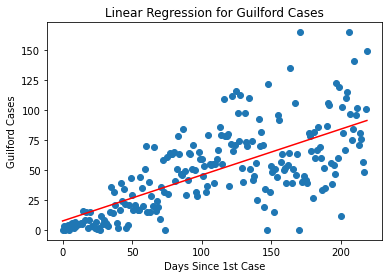

In [95]:
# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_guilford['Days Since 1st Case'])
guilford_cases = pd.DataFrame(cases_guilford['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, guilford_cases)

# Predict values for the linear regression line
guilford_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, guilford_cases)
plt.plot(days_since_cases, guilford_cases_predict, color='red')
plt.title("Linear Regression for Guilford Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("Guilford Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, guilford_cases)))

<b> Durham County </b>

In [96]:
# Picking Durham county for regression model
cc_durham = confirmed_import[confirmed_import['State']=='NC']

cc_durham = cc_durham.drop(columns=['stateFIPS'])
cc_durham = cc_durham[cc_durham['County Name']=='Durham County']

# Only keeping days since first infections
cc_durham = cc_durham.drop(cc_durham.loc[:, '1/22/20':'3/10/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_durham = cc_durham.set_index(['countyFIPS','County Name','State'])

cc_durham

,,,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
37063,Durham County,NC,1,1,1,1,1,1,1,12,33,33,...,8360,8441,8484,8508,8567,8590,8631,8652,8696,8768


In [97]:
# Grabbing the sum
cc_durham_sum = cc_durham.sum()
cc_durham_sum

3/11/20        1
3/12/20        1
3/13/20        1
3/14/20        1
3/15/20        1
            ... 
10/19/20    8590
10/20/20    8631
10/21/20    8652
10/22/20    8696
10/23/20    8768
Length: 227, dtype: int64

Intercept: [25.15012752]
Coefficient: [[0.11921255]]
Score: 0.06789918879887102


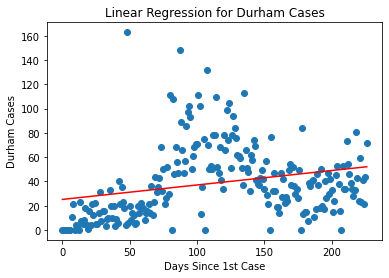

In [98]:
# Creating dataframe 
cases_durham = pd.DataFrame({'Cases':cc_durham_sum})
cases_durham['Days Since 1st Case'] = range(len(cases_durham))
cases_durham.Cases = cases_durham.Cases.diff().fillna(0)

# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_durham['Days Since 1st Case'])
durham_cases = pd.DataFrame(cases_durham['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, durham_cases)

# Predict values for the linear regression line
durham_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, durham_cases)
plt.plot(days_since_cases, durham_cases_predict, color='red')
plt.title("Linear Regression for Durham Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("Durham Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, durham_cases)))

<b> Forsyth County </b>

In [99]:
# Picking Forsyth county for regression model
cc_forsyth = confirmed_import[confirmed_import['State']=='NC']

cc_forsyth = cc_forsyth.drop(columns=['stateFIPS'])
cc_forsyth = cc_forsyth[cc_forsyth['County Name']=='Forsyth County']

# Only keeping days since first infections
cc_forsyth = cc_forsyth.drop(cc_forsyth.loc[:, '1/22/20':'3/10/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_forsyth = cc_forsyth.set_index(['countyFIPS','County Name','State'])

cc_forsyth

,,,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
37067,Forsyth County,NC,2,2,2,2,2,2,2,2,7,7,...,7813,7887,7968,8049,8131,8155,8201,8264,8319,8473


In [100]:
# Grabbing the sum
cc_forsyth_sum = cc_forsyth.sum()
cc_forsyth_sum

3/11/20        2
3/12/20        2
3/13/20        2
3/14/20        2
3/15/20        2
            ... 
10/19/20    8155
10/20/20    8201
10/21/20    8264
10/22/20    8319
10/23/20    8473
Length: 227, dtype: int64

Intercept: [13.77428704]
Coefficient: [[0.20834419]]
Score: 0.22226798004815096


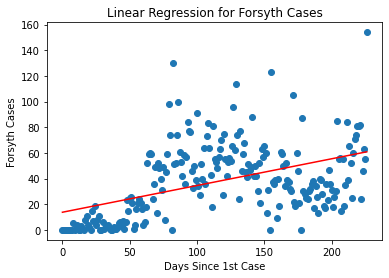

In [101]:
# Creating dataframe 
cases_forsyth = pd.DataFrame({'Cases':cc_forsyth_sum})
cases_forsyth['Days Since 1st Case'] = range(len(cases_forsyth))
cases_forsyth.Cases = cases_forsyth.Cases.diff().fillna(0)

# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_forsyth['Days Since 1st Case'])
forsyth_cases = pd.DataFrame(cases_forsyth['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, forsyth_cases)

# Predict values for the linear regression line
forsyth_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, forsyth_cases)
plt.plot(days_since_cases, forsyth_cases_predict, color='red')
plt.title("Linear Regression for Forsyth Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("Forsyth Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, forsyth_cases)))

<AxesSubplot:xlabel='Weeks Since 1st Case', ylabel='Forsyth Cases'>

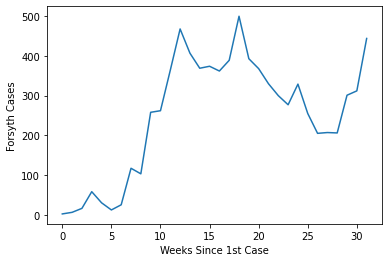

In [23]:
sns.lineplot(data=cases_frame, x='Weeks Since 1st Case', y='Forsyth Cases')

# Now to calculate the point of no-return for NC

In [109]:
# Importing the hospital beds dataset
beds_import = pd.read_csv('../Data/Input/Definitive_Healthcare_Hospital_Beds_0914.csv')

# Picking NC hospitals
beds_nc = beds_import[beds_import['HQ_STATE']=='NC']

# Dropping un-needed columns
beds_nc = beds_nc.drop(columns=['X', 'Y', 'OBJECTID', 'HOSPITAL_NAME', 'HOSPITAL_TYPE', 'HQ_ADDRESS', 'HQ_ADDRESS1', 'HQ_CITY', 'HQ_STATE', 'HQ_ZIP_CODE', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'AVG_VENTILATOR_USAGE', 'Potential_Increase_In_Bed_Capac', 'PEDI_ICU_BEDS', 'ADULT_ICU_BEDS', 'NUM_STAFFED_BEDS', 'NUM_LICENSED_BEDS'])

beds_nc = beds_nc.sum()

beds_nc

NUM_ICU_BEDS       2648.000000
BED_UTILIZATION      70.049652
dtype: float64

### As we can see, there are 2648 ICU beds across NC

### Deaths per day in NC starting from the day of the 1st death

In [140]:
deaths_nc = deaths_import[deaths_import['State']=='NC']

deaths_nc = deaths_nc[deaths_nc.countyFIPS > 0]
deaths_nc = deaths_nc.drop(columns=['stateFIPS'])

# Only keeping days since first death
deaths_nc = deaths_nc.drop(deaths_nc.loc[:, '1/22/20':'3/24/20'].columns, axis = 1)

# Setting the index
deaths_nc = deaths_nc.set_index(['countyFIPS','County Name','State'])

deaths_nc_sum = deaths_nc.sum()
deaths_nc_sum

3/25/20        1
3/26/20        1
3/27/20        3
3/28/20        4
3/29/20        4
            ... 
10/19/20    3939
10/20/20    3992
10/21/20    3992
10/22/20    4082
10/23/20    4082
Length: 213, dtype: int64

In [148]:
# Summarizing weekly deaths for NC to make the data easier to view on a graph
weekly_deaths = {}
week_number = 1

weekly_deaths[0] = [deaths_nc.columns[3], deaths_nc_sum[3]]
lastDayOfWeek = 3

# Looping through and adding weekly cases for each state
for start in range(10,deaths_nc_sum.size,7):
    weekly_deaths[week_number] = [deaths_nc.columns[start], deaths_nc_sum[start] - deaths_nc_sum[lastDayOfWeek]]
    week_number += 1
    lastDayOfWeek = start
    
deaths = pd.DataFrame.from_dict(weekly_deaths,orient='index',columns=['Week Of','NC Deaths'])
deaths = deaths.set_index(['Week Of'])
deaths

,NC Deaths
Week Of,
3/28/20,4
4/4/20,20
4/11/20,55
4/18/20,84
4/25/20,125
5/2/20,131
5/9/20,123
5/16/20,105
5/23/20,84


In [149]:
# looping through and dividing ICU bed utilization by occupancy 
for deaths_new in deaths:
    deaths[deaths_new] = (deaths[deaths_new] / 2648) / 0.70 # percent ICU utilization in NC divided by occupancy
    
deaths

,NC Deaths
Week Of,
3/28/20,0.002158
4/4/20,0.010790
4/11/20,0.029672
4/18/20,0.045317
4/25/20,0.067436
5/2/20,0.070673
5/9/20,0.066357
5/16/20,0.056647
5/23/20,0.045317


Text(0.5, 1.0, 'Point of no return for NC')

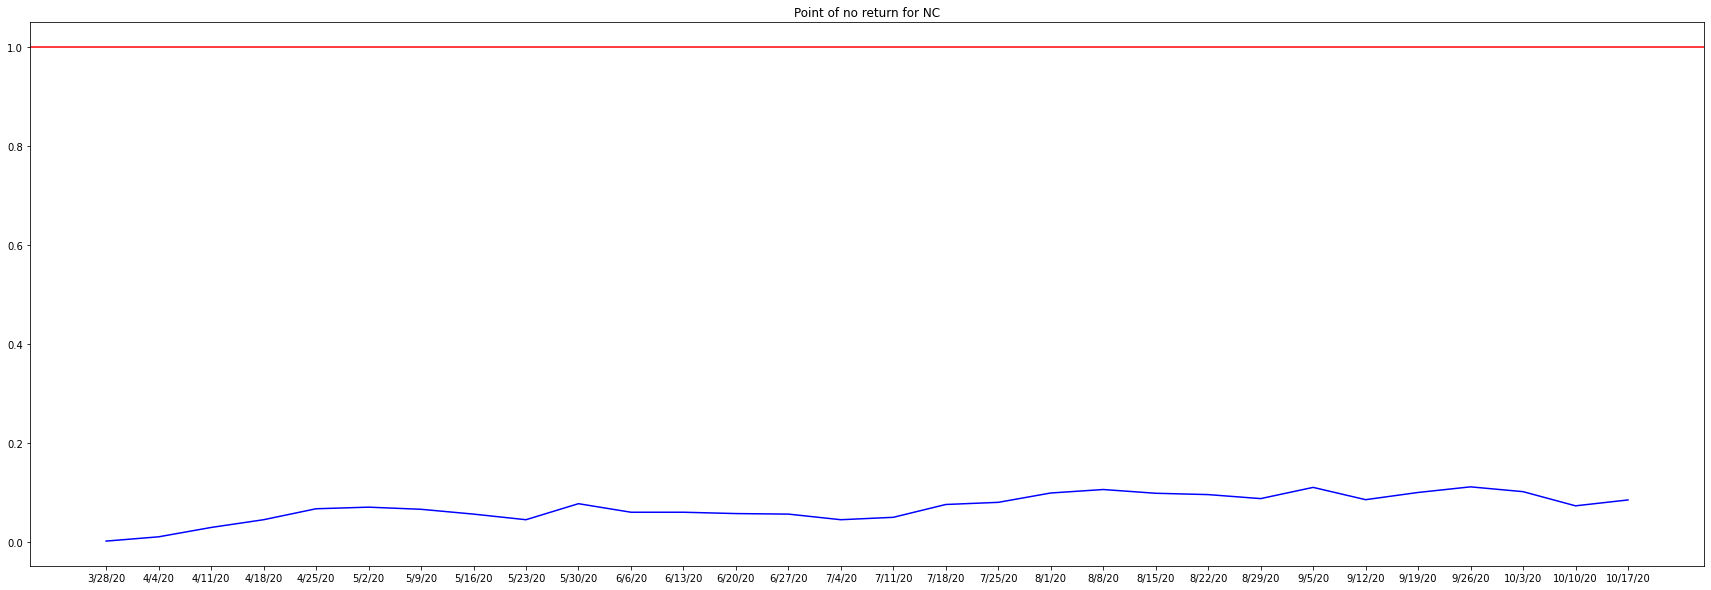

In [167]:
plt.figure(figsize=(30,10))
plt.plot(deaths.index, deaths['NC Deaths'], color='b')
plt.axhline(1, color='red') # red bar at 1 indicates a 100% capacity of ICU beds
plt.title('Point of no return for NC')

#### From the graph above, it appears that North Carolina is in good standing when it comes to the gap between the number of people who need ICU beds vs the # of ICU beds that are in North Carolina. It doesnt appear as if they will hit a point of no return anytime soon..

## Now time to utilize decision tree, random forest, and ARIMA for NC 

In [4]:
# Get data ready for NC cases
confirmed_cases_NC = confirmed_import[confirmed_import['State']=='NC']

# Getting rid of 'Statewide Unallocated'
confirmed_cases_NC = confirmed_cases_NC[confirmed_cases_NC.countyFIPS > 0]
confirmed_cases_NC = confirmed_cases_NC.drop(columns=['stateFIPS'])

# Only keeping days since first infections
confirmed_cases_NC = confirmed_cases_NC.drop(confirmed_cases_NC.loc[:, '1/22/20':'3/2/20'].columns, axis = 1)

# Setting the index
confirmed_cases_NC = confirmed_cases_NC.set_index(['countyFIPS','County Name','State'])

confirmed_cases_NC

,,,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
37001,Alamance County,NC,0,0,0,0,0,0,0,0,0,0,...,4555,4580,4675,4757,4790,4815,4828,4852,4899,4958
37003,Alexander County,NC,0,0,0,0,0,0,0,0,0,0,...,623,636,653,671,698,706,730,741,751,797
37005,Alleghany County,NC,0,0,0,0,0,0,0,0,0,0,...,258,261,262,264,265,269,270,271,275,278
37007,Anson County,NC,0,0,0,0,0,0,0,0,0,0,...,678,680,687,689,694,696,699,702,706,713
37009,Ashe County,NC,0,0,0,0,0,0,0,0,0,0,...,336,347,358,364,366,367,370,370,377,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37191,Wayne County,NC,0,0,0,0,0,0,0,0,0,0,...,3938,3996,4056,4095,4171,4190,4200,4252,4313,4387
37193,Wilkes County,NC,0,0,0,0,0,0,0,0,0,0,...,1488,1511,1533,1543,1553,1566,1569,1587,1606,1647
37195,Wilson County,NC,0,0,0,0,0,0,0,0,0,0,...,2554,2585,2640,2670,2699,2719,2737,2757,2797,2860


In [5]:
# Getting the sum of cases
cc_nc_sum = confirmed_cases_NC.sum()
cc_nc_sum

3/3/20           1
3/4/20           1
3/5/20           1
3/6/20           2
3/7/20           2
             ...  
10/19/20    247168
10/20/20    248750
10/21/20    250586
10/22/20    252992
10/23/20    256284
Length: 235, dtype: int64

In [6]:
# Summarizing weekly cases
weekly_cases = {}
week_number = 1

weekly_cases[0] = [confirmed_cases_NC.columns[3], cc_nc_sum[3], cc_nc_sum[3]]
lastDayOfWeek = 3

# Looping through and adding weekly cases for each state
for start in range(10,cc_nc_sum.size,7):
    weekly_cases[week_number] = [confirmed_cases_NC.columns[start], cc_nc_sum[start] - cc_nc_sum[lastDayOfWeek], cc_nc_sum[start] - cc_nc_sum[lastDayOfWeek]]
    week_number += 1
    lastDayOfWeek = start
    
cases_frame = pd.DataFrame.from_dict(weekly_cases,orient='index',columns=['Week Of','Cases', 'Previous Week Cases'])
#cases_frame = cases_frame.set_index(['Week Of'])
cases_frame['Week'] = range(len(cases_frame))
cases_frame = cases_frame.drop(columns=['Week Of'])
cases_frame

,Cases,Previous Week Cases,Week
0,2,2,0
1,15,15,1
2,119,119,2
3,627,627,3
4,1330,1330,4
5,1813,1813,5
6,1944,1944,6
7,1929,1929,7
8,3138,3138,8
9,2946,2946,9


In [7]:
# Shifting row down for previous weeks cases column
cases_frame['Previous'] = cases_frame['Previous Week Cases'].shift(1).fillna(0)
cases_frame

,Cases,Previous Week Cases,Week,Previous
0,2,2,0,0.0
1,15,15,1,2.0
2,119,119,2,15.0
3,627,627,3,119.0
4,1330,1330,4,627.0
5,1813,1813,5,1330.0
6,1944,1944,6,1813.0
7,1929,1929,7,1944.0
8,3138,3138,8,1929.0
9,2946,2946,9,3138.0


In [8]:
cases_frame = cases_frame.drop(columns=['Previous Week Cases'])
cases_frame

,Cases,Week,Previous
0,2,0,0.0
1,15,1,2.0
2,119,2,15.0
3,627,3,119.0
4,1330,4,627.0
5,1813,5,1330.0
6,1944,6,1813.0
7,1929,7,1944.0
8,3138,8,1929.0
9,2946,9,3138.0


# Now to start the decision tree

In [36]:
predict_cases = cases_frame.copy()
predict_cases = predict_cases.drop(columns=['Previous Week Cases'])
predict_cases

,Cases,Week
0,2,0
1,15,1
2,119,2
3,627,3
4,1330,4
5,1813,5
6,1944,6
7,1929,7
8,3138,8
9,2946,9


In [37]:
inputs = cases_frame.drop('Cases', axis='columns')
inputs

,Previous Week Cases,Week
0,0.0,0
1,2.0,1
2,15.0,2
3,119.0,3
4,627.0,4
5,1330.0,5
6,1813.0,6
7,1944.0,7
8,1929.0,8
9,3138.0,9


In [38]:
from sklearn import tree

In [51]:
model = tree.DecisionTreeRegressor()

In [53]:
model = model.fit(inputs, predict_cases)

In [56]:
model.predict([[14192, 34]])

array([[14661.,    33.]])

<b> This gave us an 14661 cases for the 34th week, which is what we got in the data! </b>

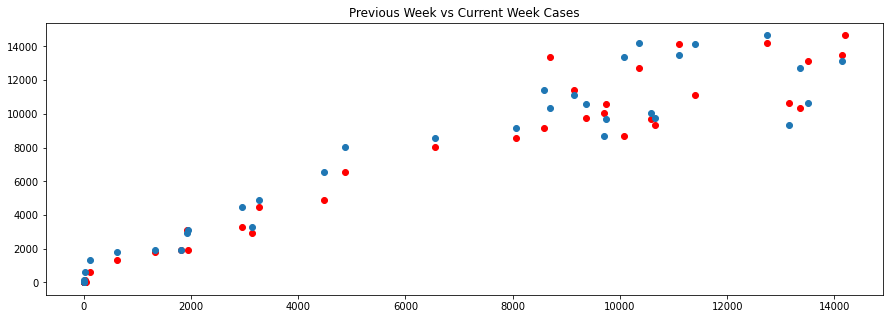

In [65]:
plt.figure(figsize=(15,5))
plt.scatter(inputs, predict_cases,color='red')
plt.scatter(cases_frame.Previous, cases_frame.Cases)
plt.title('Previous Week vs Current Week Cases')
plt.show()

In [69]:
from math import sqrt
from sklearn.metrics import mean_squared_error

print('RMSE for the decision tree is: {}'.format(sqrt(mean_squared_error(inputs, predict_cases))))

RMSE for the decision tree is: 1052.3775393337305


# Random Forest Model

In [80]:
x = inputs
y = predict_cases

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [97]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

In [98]:
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 746.8364155604245


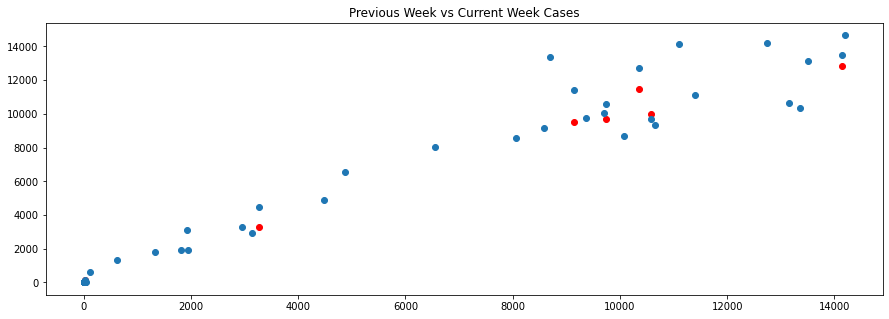

In [100]:
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_predict,color='red')
plt.scatter(x, y)
plt.title('Previous Week vs Current Week Cases')
plt.show()

<b> Root Mean Squared Error: 746.8364155604245 </b>

# ARIMA MODEL

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Cases   No. Observations:                   33
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -283.988
Method:                       css-mle   S.D. of innovations           1317.167
Date:                Sun, 15 Nov 2020   AIC                            581.976
Time:                        18:15:56   BIC                            592.451
Sample:                             1   HQIC                           585.500
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           454.7383    226.180      2.011      0.044      11.434     898.043
ar.L1.D.Cases    -0.2770      0.171     -1.622      0.105      -0.612       0.058
ar.L2.D.Cases     0.2379      0.187     

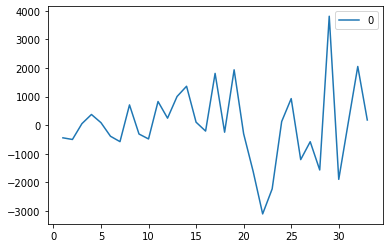

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot

model = ARIMA(cases_frame.Cases, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# Use 5 different variables from the enrichment data to predict the spread rate (cases and deaths) of COVID-19 in a county. Compare Random Forest and Decision Trees (RMSE error). 

In [6]:
# Start by getting the case and deaths of a county in NC (Forsyth)
cc_nc = confirmed_import[confirmed_import['State']=='NC']

# Getting rid of 'Statewide Unallocated'
cc_nc = cc_nc[cc_nc.countyFIPS > 0]
cc_nc = cc_nc.drop(columns=['stateFIPS'])
cc_nc = cc_nc[cc_nc['County Name']=='Forsyth County']

# Only keeping days since first infections
cc_nc = cc_nc.drop(cc_nc.loc[:, '1/22/20':'3/1/20'].columns, axis = 1)

# Setting the index
cc_nc = cc_nc.set_index(['countyFIPS','County Name','State'])

In [7]:
cc_nc

,,,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
37067,Forsyth County,NC,0,0,0,0,0,0,0,0,0,2,...,7813,7887,7968,8049,8131,8155,8201,8264,8319,8473


In [8]:
cc_nc_sum = cc_nc.sum()
cc_nc_sum

3/2/20         0
3/3/20         0
3/4/20         0
3/5/20         0
3/6/20         0
            ... 
10/19/20    8155
10/20/20    8201
10/21/20    8264
10/22/20    8319
10/23/20    8473
Length: 236, dtype: int64

In [9]:
# Start by getting the case and deaths of a county in NC (Forsyth)
deaths_nc = deaths_import[deaths_import['State']=='NC']

deaths_nc = deaths_nc.drop(columns=['stateFIPS'])
deaths_nc = deaths_nc[deaths_nc['County Name']=='Forsyth County']

# Only keeping days since first infections
deaths_nc = deaths_nc.drop(deaths_nc.loc[:, '1/22/20':'3/1/20'].columns, axis = 1)

# Setting the index
deaths_nc = deaths_nc.set_index(['countyFIPS','County Name','State'])

deaths_nc_sum = deaths_nc.sum()
deaths_nc_sum

3/2/20        0
3/3/20        0
3/4/20        0
3/5/20        0
3/6/20        0
           ... 
10/19/20    112
10/20/20    114
10/21/20    114
10/22/20    115
10/23/20    115
Length: 236, dtype: int64

<b> As we can see from above, the total deaths in NC is 115, while the total cases is 8473 </b>

<b> Now we import our enrichment data. I chose ACS Sex and Age Dataset </b>

In [27]:
enrichment_data = pd.read_csv('../Data/Input/ACS Sex And Age Dataset/ACSST1Y2018.S0101_data_with_overlays_2020-09-12T231309.csv', na_values=['(X)'])
enrichment_data

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C02_001E,S0101_C02_001M,S0101_C03_001E,S0101_C03_001M,S0101_C04_001E,S0101_C04_001M,...,S0101_C02_038E,S0101_C02_038M,S0101_C03_038E,S0101_C03_038M,S0101_C04_038E,S0101_C04_038M,S0101_C05_038E,S0101_C05_038M,S0101_C06_038E,S0101_C06_038M
0,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total MOE!!Total population,Estimate!!Percent!!Total population,Margin of Error!!Percent MOE!!Total population,Estimate!!Male!!Total population,Margin of Error!!Male MOE!!Total population,Estimate!!Percent Male!!Total population,Margin of Error!!Percent Male MOE!!Total popul...,...,Estimate!!Percent!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent MOE!!PERCENT ALLOCATE...,Estimate!!Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Male MOE!!PERCENT ALL...,Estimate!!Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Female MOE!!PERCENT ALLOCATED...,Estimate!!Percent Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female MOE!!PERCENT A...
1,0500000US01117,"Shelby County, Alabama",215707,*****,NaN,NaN,105022,1416,NaN,NaN,...,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01121,"Talladega County, Alabama",79828,*****,NaN,NaN,38489,450,NaN,NaN,...,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01125,"Tuscaloosa County, Alabama",208911,*****,NaN,NaN,99576,877,NaN,NaN,...,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US04021,"Pinal County, Arizona",447138,*****,NaN,NaN,233292,675,NaN,NaN,...,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0500000US06007,"Butte County, California",231256,*****,NaN,NaN,113736,705,NaN,NaN,...,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,0500000US06017,"El Dorado County, California",190678,*****,NaN,NaN,94527,600,NaN,NaN,...,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,0500000US06025,"Imperial County, California",181827,*****,NaN,NaN,93655,792,NaN,NaN,...,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,0500000US06029,"Kern County, California",896764,*****,NaN,NaN,459769,719,NaN,NaN,...,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Replacing the default header with the first row
new_header = enrichment_data.iloc[0]
enrichment_data = enrichment_data[1:] 
enrichment_data.columns = new_header
enrichment_data

,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total MOE!!Total population,Estimate!!Percent!!Total population,Margin of Error!!Percent MOE!!Total population,Estimate!!Male!!Total population,Margin of Error!!Male MOE!!Total population,Estimate!!Percent Male!!Total population,Margin of Error!!Percent Male MOE!!Total population,...,Estimate!!Percent!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent MOE!!PERCENT ALLOCATED!!Age,Estimate!!Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Female MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female MOE!!PERCENT ALLOCATED!!Age
1,0500000US01117,"Shelby County, Alabama",215707,*****,NaN,NaN,105022,1416,NaN,NaN,...,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01121,"Talladega County, Alabama",79828,*****,NaN,NaN,38489,450,NaN,NaN,...,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01125,"Tuscaloosa County, Alabama",208911,*****,NaN,NaN,99576,877,NaN,NaN,...,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US04021,"Pinal County, Arizona",447138,*****,NaN,NaN,233292,675,NaN,NaN,...,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0500000US06045,"Mendocino County, California",87606,*****,NaN,NaN,43017,945,NaN,NaN,...,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0500000US06007,"Butte County, California",231256,*****,NaN,NaN,113736,705,NaN,NaN,...,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,0500000US06017,"El Dorado County, California",190678,*****,NaN,NaN,94527,600,NaN,NaN,...,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,0500000US06025,"Imperial County, California",181827,*****,NaN,NaN,93655,792,NaN,NaN,...,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,0500000US06029,"Kern County, California",896764,*****,NaN,NaN,459769,719,NaN,NaN,...,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
forsyth = enrichment_data[enrichment_data['Geographic Area Name']=='Forsyth County, North Carolina']
forsyth

,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total MOE!!Total population,Estimate!!Percent!!Total population,Margin of Error!!Percent MOE!!Total population,Estimate!!Male!!Total population,Margin of Error!!Male MOE!!Total population,Estimate!!Percent Male!!Total population,Margin of Error!!Percent Male MOE!!Total population,...,Estimate!!Percent!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent MOE!!PERCENT ALLOCATED!!Age,Estimate!!Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Female MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female MOE!!PERCENT ALLOCATED!!Age
492,0500000US37067,"Forsyth County, North Carolina",379099,*****,NaN,NaN,180429,315,NaN,NaN,...,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 5 variables I will choose from the ACS Sex and Age dataset are:
    <b>
    <br>
    1.) Estimate!!Total!!Total population
    <br>
    2.) Estimate!!Male!!Total population
    <br>
    3.) Estimate!!Female!!Total population
    <br>
    4.) Estimate!!Total!!Total population!!AGE!!15 to 19 years
    <br>
    5.) Estimate!!Total!!Total population!!AGE!!20 to 24 years
    </b>


In [33]:
cases_rate = 8473 / 379099 # cases divided by population in Forsyth County
print(cases_rate)

deaths_rate = 115 / 379099
print(deaths_rate)

0.022350362306416002
0.00030335083975425943


In [49]:
# Create the dataframe for Forsyth County using the numbers given

cases = [8473]
deaths = [115]

# Adding the enrichment data variables
forsyth_final = forsyth[['Geographic Area Name', 'Estimate!!Total!!Total population', 'Estimate!!Male!!Total population', 'Estimate!!Female!!Total population', 'Estimate!!Total!!Total population!!AGE!!15 to 19 years', 'Estimate!!Total!!Total population!!AGE!!20 to 24 years']]
forsyth_final['Cases_Rate'] = cases
forsyth_final['Deaths_Rate'] = deaths

forsyth_final

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Geographic Area Name,Estimate!!Total!!Total population,Estimate!!Male!!Total population,Estimate!!Female!!Total population,Estimate!!Total!!Total population!!AGE!!15 to 19 years,Estimate!!Total!!Total population!!AGE!!20 to 24 years,Cases_Rate,Deaths_Rate
492,"Forsyth County, North Carolina",379099,180429,198670,27307,25400,8473,115


# Decision Tree

In [71]:
# DECISION TREE FOR CASES IN FORSYTH COUNTY

from sklearn import tree
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

x = forsyth_final.iloc[:, 1:6]
y = forsyth_final['Cases_Rate']

model = tree.DecisionTreeRegressor()
model = model.fit(x, y)

y_predict = model.predict(x)

print('RMSE of CASES in FORSYTH COUNTY is: {}'.format(sqrt(mean_squared_error(y, y_predict))))

RMSE of CASES in FORSYTH COUNTY is: 0.0


In [72]:
# DECISION TREE FOR CASES IN FORSYTH COUNTY

from sklearn import tree
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

x = forsyth_final.iloc[:, 1:6]
y = forsyth_final['Deaths_Rate']

model = tree.DecisionTreeRegressor()
model = model.fit(x, y)

y_predict = model.predict(x)

print('RMSE of Deaths in FORSYTH COUNTY is: {}'.format(sqrt(mean_squared_error(y, y_predict))))

RMSE of Deaths in FORSYTH COUNTY is: 0.0


# Random Forest

In [74]:
X = forsyth_final.iloc[:, 1:6].values
y = forsyth_final['Cases_Rate'].values

In [75]:
X

array([['379099', '180429', '198670', '27307', '25400']], dtype=object)

In [76]:
y

array([8473])

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [81]:
X = forsyth_final.iloc[:, 1:6].values
y = forsyth_final['Deaths_Rate'].values

In [82]:
X

array([['379099', '180429', '198670', '27307', '25400']], dtype=object)

In [83]:
y

array([115])

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

# Why did I chose these Variables?

The 5 variables I will choose from the ACS Sex and Age dataset are:
    <b>
    <br>
    1.) Estimate!!Total!!Total population
    <br>
    2.) Estimate!!Male!!Total population
    <br>
    3.) Estimate!!Female!!Total population
    <br>
    4.) Estimate!!Total!!Total population!!AGE!!15 to 19 years
    <br>
    5.) Estimate!!Total!!Total population!!AGE!!20 to 24 years
    </b>

I chose these 5 because they're all relevant within each other. When you look to analyze the covid spread rate in a specific county, you want to know the total population in that county, and when getting more into specifics you'd want to which chunk of this population is female, male, age 15-19, and age 20-24. It's good to know the rates at which they spread within these specific sex and age groups!

<div class="alert-danger">
DISCLAIMER: MEMBER TASK 2 (Graphs) is integrated into MEMBER TASK 1 throughout the notebook
</div>